# Task 1
Done by Nikita Matveev (group j4133c), Arina Shinkorenok (group j4132c), Fyodor Prazdnikov (group j4132c)

**Description:**

NOTE. For this lab you need subsample with 3-5 random variables, at least half of them should be described with continuous random variable type.

- Step 1. Choose subsample with main variables for your further analysis. Then for each of them:
- Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).
- Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.
- Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.
- Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.
- Step 6. Validate your estimated parameters using QQ biplots.
- Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

**Description:**

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

**Key Features:**

track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.optimize
from scipy.optimize import minimize
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')


In [2]:
df = pd.read_csv('./spotify-2023.csv', sep=',', encoding='windows-1251')


In [3]:
df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Step 1. Choose subsample with main variables for your further analysis.

In [5]:
data = df[['artist_count', 'streams', 'in_spotify_playlists','in_apple_playlists']].copy().sample(300)


In [6]:
# data = df[['artist_count', 'streams', 'in_spotify_playlists','in_apple_playlists']]
data.head()


,artist_count,streams,in_spotify_playlists,in_apple_playlists
775,2,479655659,1796,8
728,2,236872197,2605,15
102,1,172825906,2528,56
573,2,566954746,6026,171
159,1,929964809,3859,133


## Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV)

In [7]:
data['artist_count'] = pd.to_numeric(data['artist_count'], errors='coerce')
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_spotify_playlists'] = pd.to_numeric(data['in_spotify_playlists'], errors='coerce')
data['in_apple_playlists'] = pd.to_numeric(data['in_apple_playlists'], errors='coerce')


In [8]:
def IQR(array):
    q75, q25 = np.percentile(array, [75, 25])
    interval = q75 - q25

    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)

    arr = [data for data in array if min_dist <= data <= max_dist]
    return arr


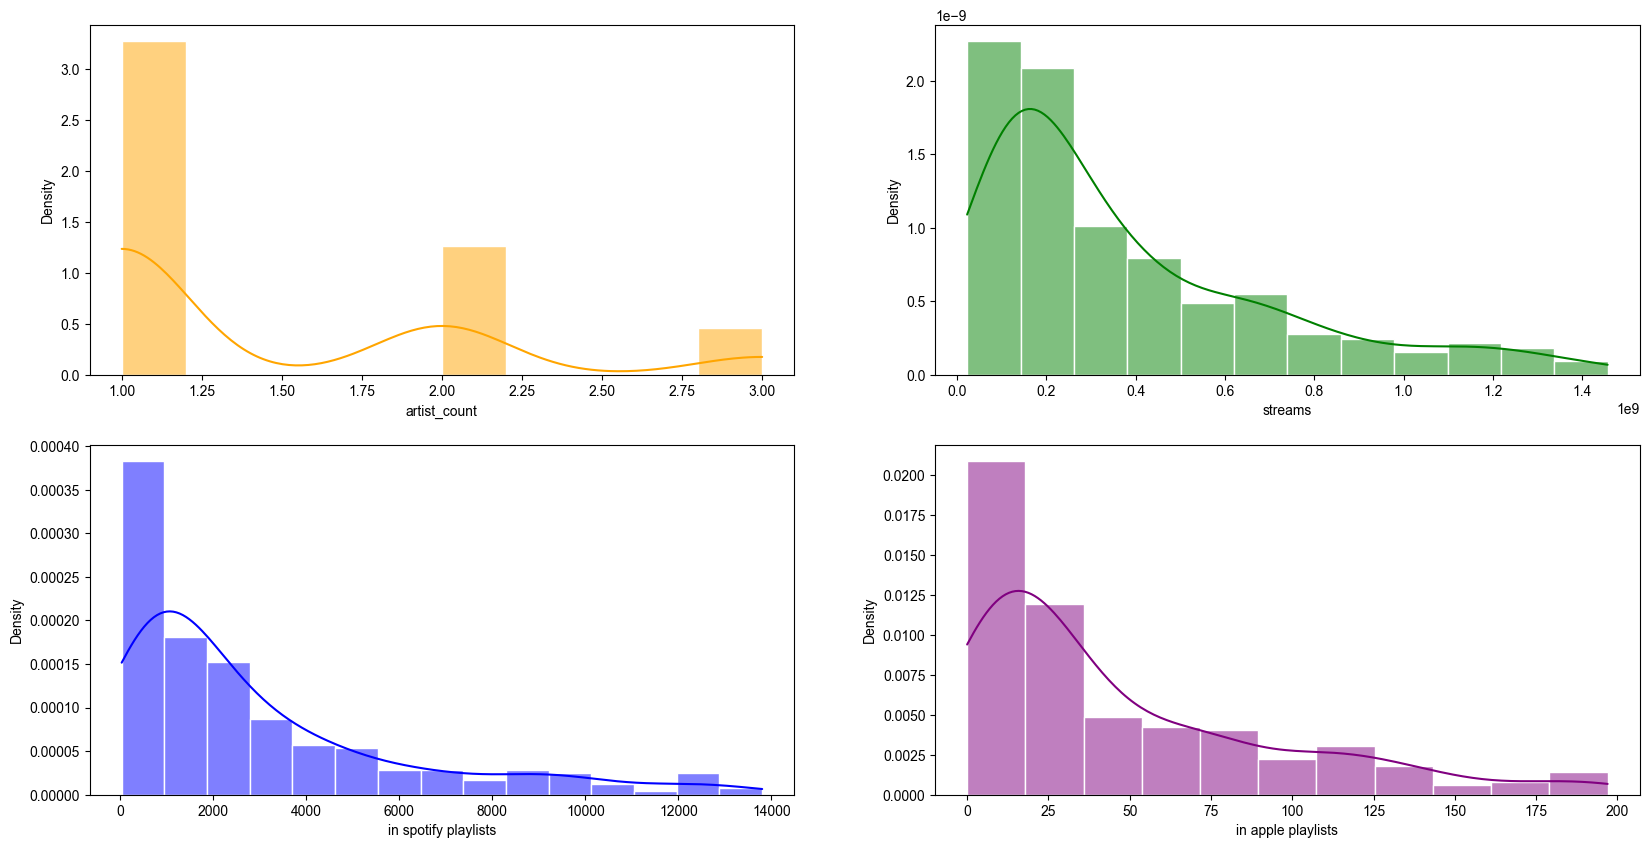

In [9]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set(style='whitegrid', palette='Set2')  # Здесь можно изменить цвета, используя другие палитры Seaborn

artist_count = sns.histplot(IQR(data['artist_count'].dropna()), ax=ax[0, 0], kde=True, stat='density', color='orange')
artist_count.set(xlabel='artist_count')

streams = sns.histplot(IQR(data['streams'].dropna()), ax=ax[0, 1], kde=True, stat='density', color='green')
streams.set(xlabel='streams')

in_spotify_playlists = sns.histplot(IQR(data['in_spotify_playlists'].dropna()), ax=ax[1, 0], kde=True, stat='density', color='blue')
in_spotify_playlists.set(xlabel='in spotify playlists')

in_apple_playlists = sns.histplot(IQR(data['in_apple_playlists'].dropna()), ax=ax[1, 1], kde=True, stat='density', color='purple')
in_apple_playlists.set(xlabel='in apple playlists')

plt.show()


## Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot. 

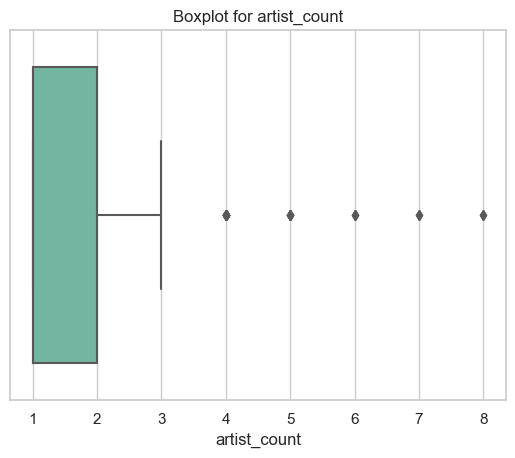

Column Name: artist_count
Mean: 1.5561385099685205
Median: 1.0
Variance: 0.7975279303746683
Standard Deviation: 0.8930441928452748
------


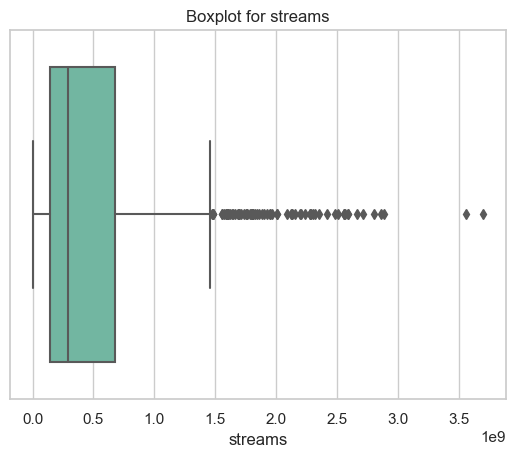

Column Name: streams
Mean: 514137424.93907565
Median: 290530915.0
Variance: 3.213268006736707e+17
Standard Deviation: 566856949.038883
------


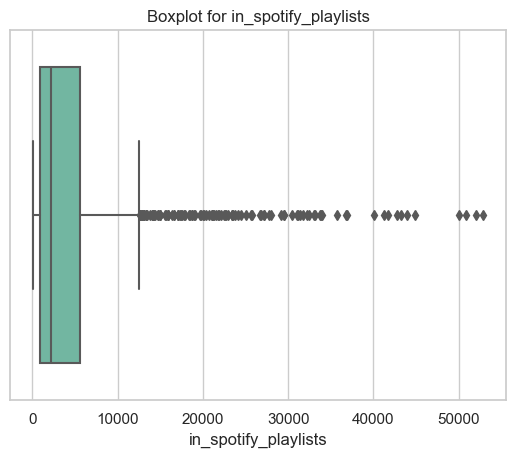

Column Name: in_spotify_playlists
Mean: 5200.124868835257
Median: 2224.0
Variance: 62372227.76485358
Standard Deviation: 7897.608990375098
------


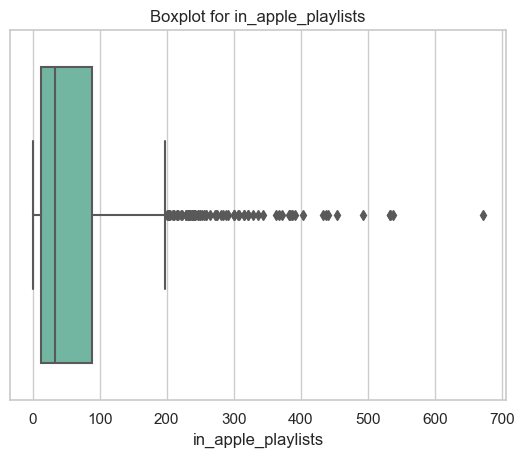

Column Name: in_apple_playlists
Mean: 67.8121720881427
Median: 34.0
Variance: 7472.131700424136
Standard Deviation: 86.4414929326428
------


In [10]:
features = ['artist_count', 'streams', 'in_spotify_playlists', 'in_apple_playlists']

for col_name in features:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

for col_name in features:
    sns.boxplot(x=df[col_name])
    plt.title(f'Boxplot for {col_name}')
    plt.show()

    mean = df[col_name].mean()
    median = df[col_name].median()
    var = df[col_name].var()
    std = df[col_name].std()

    print(f"Column Name: {col_name}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Variance: {var}")
    print(f"Standard Deviation: {std}")
    print("------")


 ## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

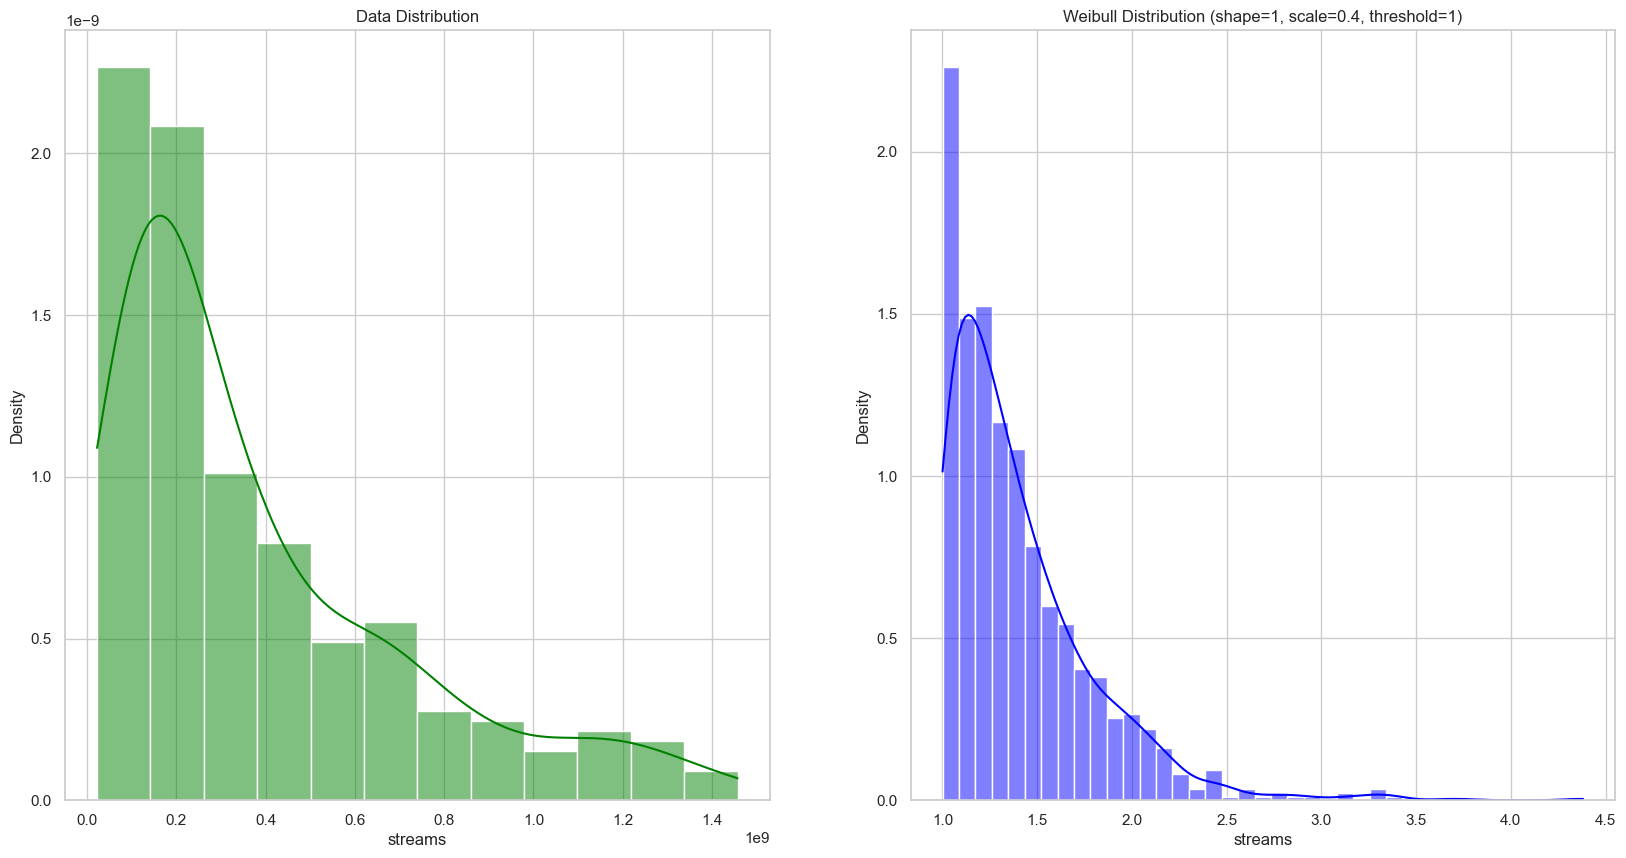

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import weibull_min

# Parameters for Weibull distribution
shape = 1
scale = 0.4
threshold = 1
size = 1000  # Number of data points to generate

# Generate data from Weibull distribution
weibull_data = weibull_min.rvs(shape, loc=threshold, scale=scale, size=size)

# Plotting code
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
sns.set(style='whitegrid', palette='Set2')

# Plot histogram and KDE on the first axis
streams_sample = IQR(data['streams'].dropna())
sns.histplot(streams_sample, ax=ax1, kde=True, stat='density', color='green', label='Data')
ax1.set(xlabel='streams')
ax1.set_title('Data Distribution')

# Plot the Weibull distribution on the second axis
sns.histplot(weibull_data, ax=ax2, kde=True, stat='density', color='blue', label='Weibull Distribution')
ax2.set(xlabel='streams')
ax2.set_title(f'Weibull Distribution (shape={shape}, scale={scale}, threshold={threshold})')


plt.show()


## Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method. 

In [49]:
import numpy as np
from scipy.stats import rv_continuous

class weibull_gen(rv_continuous):
    def _pdf(self, x, c):
        return c * x**(c - 1) * np.exp(-x**c)

weibull = weibull_gen(name='weibull', shapes='c')

# Assuming you have data as a NumPy array or a list
sample_data = IQR(data['streams'].dropna())
sample_data = [_ / 1_000_000 for _ in sample_data]


a, c, loc, scale = scipy.stats.exponweib.fit(sample_data, floc=2, f0=5)


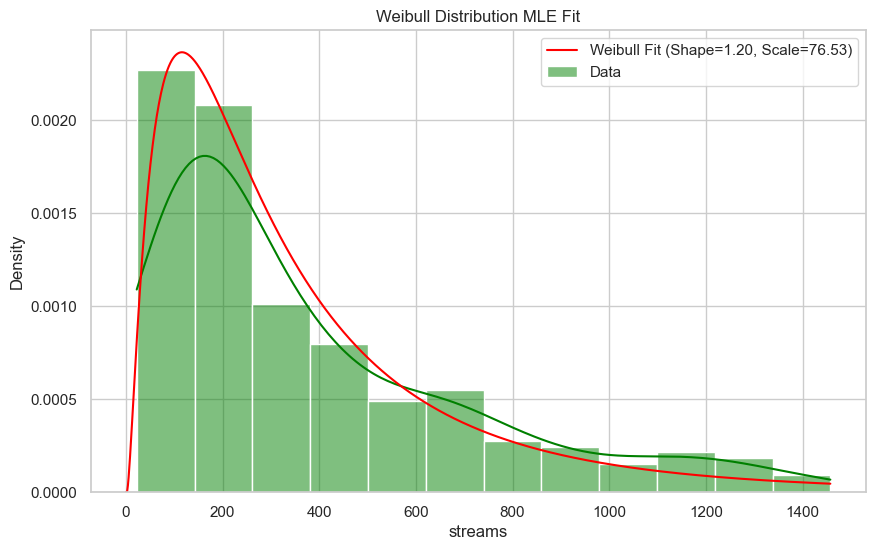

Weibull Distribution Parameters (MLE): Shape=1.20, Scale=76.53


In [50]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
sns.set(style='whitegrid', palette='Set2')
plt.figure(figsize=(10, 6))
sns.histplot(sample_data, kde=True, stat='density', color='green', label='Data')

# Plot the Weibull distribution with MLE parameters
x = np.linspace(0, max(sample_data), 1000)
weibull_pdf = scipy.stats.exponweib.pdf(x, a, c, loc=loc, scale=scale)
plt.plot(x, weibull_pdf, color='red', label=f'Weibull Fit (Shape={shape:.2f}, Scale={scale:.2f})')

plt.xlabel('streams')
plt.title('Weibull Distribution MLE Fit')
plt.legend()
plt.show()

print(f"Weibull Distribution Parameters (MLE): Shape={shape:.2f}, Scale={scale:.2f}")


## Step 6. Validate your estimated parameters using QQ biplots. 

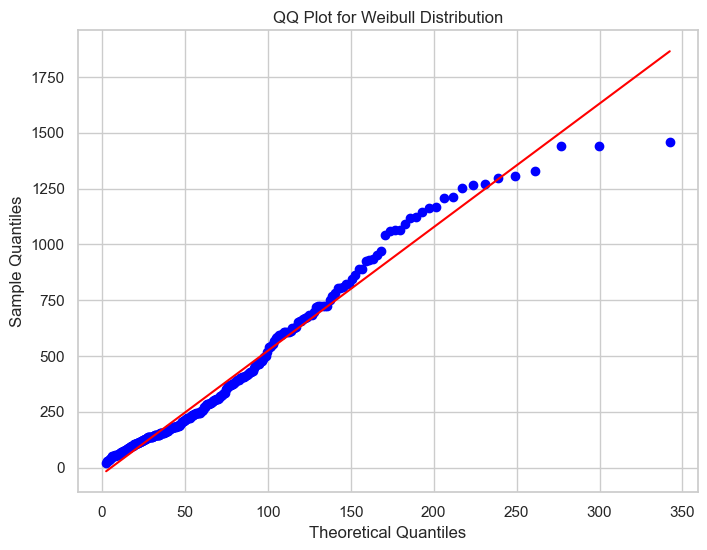

In [51]:
# Generate quantiles from the Weibull distribution using MLE parameters
weibull_quantiles = weibull_min.ppf(np.linspace(0.01, 0.99, len(sample_data)), shape, loc=loc, scale=scale)

# Create QQ plot
plt.figure(figsize=(8, 6))
scipy.stats.probplot(sample_data, dist=weibull_min, sparams=(shape, loc, scale), plot=plt)
plt.title('QQ Plot for Weibull Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


## Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

In [61]:
from scipy.stats import kstest


ks_stat, ks_p_value = kstest(sample_data, cdf='exponweib', args=(a, c, loc, scale))
print(f"KS Test Statistic: {ks_stat}")
print(f"KS Test P-Value: {ks_p_value}")

# Interpret the KS test result
alpha = 0.05  # Significance level
if ks_p_value > alpha:
    print("KS test: The data follows the Weibull distribution.")
else:
    print("KS test: The data does not follow the Weibull distribution.")


KS Test Statistic: 0.05780713676909505
KS Test P-Value: 0.3092747057514088
KS test: The data follows the Weibull distribution.
